## Kernels No Lineales

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles, make_blobs
from sklearn.svm import SVC

In [49]:
X, Y = make_circles(n_samples=100, factor=.1, noise=.1)

In [50]:
def plt_svc(model, ax= None, plot_support=True):
    """Plot de la funcion de la decicsion para una clasificacion en 2D con SVC """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Generamos los valores a evaluar
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #representamos las fronteras y los margenes del SVC
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=.5,
                linestyle=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=50,
                  linewidth=1,
                  facecolors='b')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

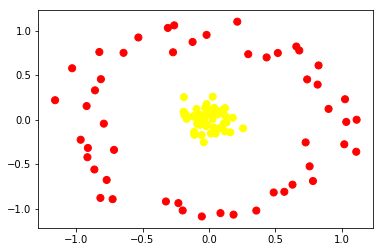

In [51]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='autumn', s=50)

/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


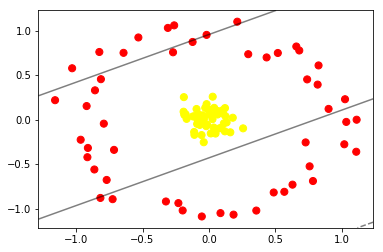

In [52]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='autumn', s=50)
plt_svc(SVC(kernel='linear').fit(X,Y), plot_support=False)

In [53]:
r = np.exp(- (X**2).sum(1) )

In [54]:
from mpl_toolkits import mplot3d

In [55]:
def plt_3d(elevacion=30, azim=30, X=X, Y=Y, Z=r):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], Z, c=Y, cmap='autumn', s=50)
    ax.view_init(elev= elevacion, azim= azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('x[1]')
    ax.set_zlabel('z')

In [56]:
from ipywidgets import interact, fixed

In [57]:
interact(plt_3d, elevacion=[-90,-60, -30, 0, 30, 60, 90], azim=[-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], X=fixed(X), Y=fixed(Y), Z=fixed(r))

interactive(children=(Dropdown(description='elevacion', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value…

<function __main__.plt_3d(elevacion=30, azim=30, X=array([[-6.42780299e-01,  7.50808989e-01],
       [ 1.03337531e+00, -2.56169380e-02],
       [ 1.11132983e+00, -1.05242323e-03],
       [-4.97068170e-02, -3.45378560e-02],
       [-1.23093628e-01,  8.72949230e-01],
       [ 4.33919289e-01,  6.99135906e-01],
       [ 6.28861375e-01, -7.30873144e-01],
       [ 1.85076348e-01, -1.06779068e+00],
       [-3.81679468e-02,  6.67519906e-03],
       [-7.91204957e-01, -4.52907662e-02],
       [ 7.89374349e-02, -9.81097282e-02],
       [-1.11413746e-01, -1.38814054e-01],
       [-9.11043216e-01, -3.18223102e-01],
       [ 1.10845972e+00, -3.61015308e-01],
       [ 1.60783096e-01, -1.42502815e-01],
       [ 7.57561901e-01, -5.24858591e-01],
       [ 5.18300601e-01,  7.49113142e-01],
       [-1.90888743e-01,  8.91219696e-02],
       [ 7.27609385e-01, -2.56003666e-01],
       [-3.09165464e-01,  1.03084189e+00],
       [ 6.57461096e-01,  8.21943674e-01],
       [-1.07303393e-01,  3.89265527e-02],
   

In [58]:
rbf = SVC(kernel='rbf', C=1e10)
rbf.fit(X,Y)

/home/lautaro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


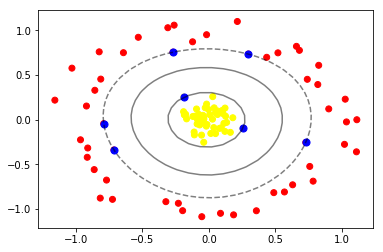

In [59]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='autumn')
plt_svc(rbf)

## Ajustando las SVM

In [73]:
X2, Y2 = make_blobs(n_samples=100, centers= 2, random_state=0, cluster_std=1.2)

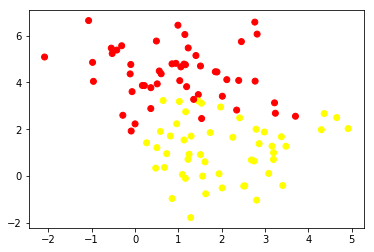

In [74]:
plt.scatter(X2[:,0], X2[:,1], c=Y2, cmap='autumn')

/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)
/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)
/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)
/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)
/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)
/home/lautaro/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


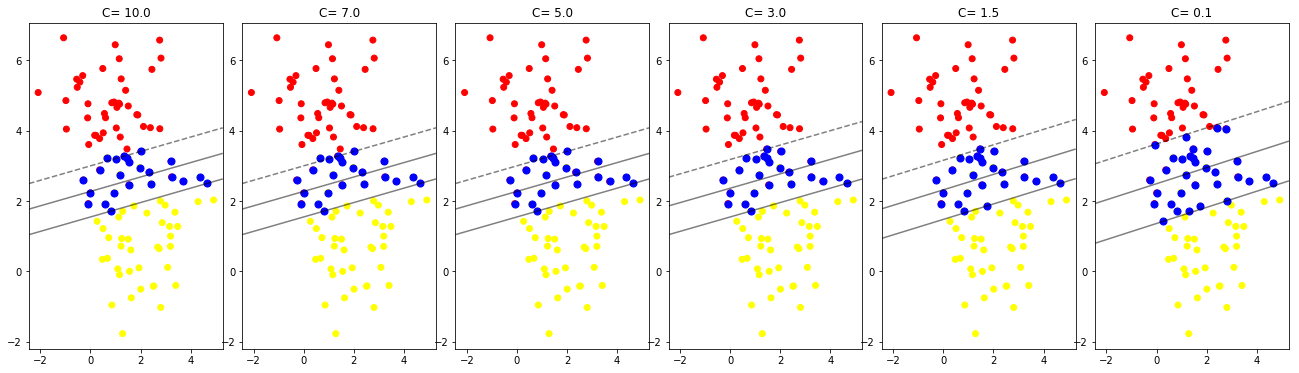

In [75]:
fig, ax = plt.subplots(1, 6, figsize=(50,6))
fig.subplots_adjust(left=0.6, right= .95, wspace=.1)

for ax_i, C in zip(ax, [10.0, 7.0, 5.0, 3.0, 1.5 ,0.1]):
    model = SVC(kernel='linear', C=C)
    model.fit(X2, Y2)
    ax_i.scatter(X2[:,0], X2[:,1], c=Y2, cmap='autumn')
    plt_svc(model, ax_i)
    ax_i.set_title('C= {0:.1f}'.format(C))